# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

## Аналитика

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from pyspark.sql import SparkSession

импортировать файлы:

In [2]:
APP_NAME = "DataFrames"
SPARK_URL = "local[*]"

spark = SparkSession.builder.appName(APP_NAME) \
        .config('spark.ui.showConsoleProgress', 'false') \
        .getOrCreate()

model_plane = spark.read.load('/datasets/query_1.csv', 
                       format='csv', header='true', inferSchema='true')

arrival_city = spark.read.load('/datasets/query_3.csv', 
                       format='csv', header='true', inferSchema='true')

изучить данные в них:

In [3]:
model_plane.show()
print(model_plane.describe().show())

arrival_city.show(5)
print(arrival_city.describe().show())

+-------------------+--------------+
|              model|flights_amount|
+-------------------+--------------+
|    Airbus A319-100|           607|
|    Airbus A321-200|           960|
|     Boeing 737-300|           630|
|     Boeing 767-300|           600|
|     Boeing 777-300|           300|
| Bombardier CRJ-200|          4446|
| Cessna 208 Caravan|          4557|
|Sukhoi SuperJet-100|          4185|
+-------------------+--------------+

+-------+-------------------+------------------+
|summary|              model|    flights_amount|
+-------+-------------------+------------------+
|  count|                  8|                 8|
|   mean|               null|          2035.625|
| stddev|               null|1965.2039470679445|
|    min|    Airbus A319-100|               300|
|    max|Sukhoi SuperJet-100|              4557|
+-------+-------------------+------------------+

None
+-----------+------------------+
|       city|   average_flights|
+-----------+------------------+
|     Аба

Видно, что пропусков в данных нет.

проверить типы данных на корректность:

In [4]:
print(model_plane)
print(arrival_city)

DataFrame[model: string, flights_amount: int]
DataFrame[city: string, average_flights: double]


Типы данных соответствуют.

выбрать топ-10 городов по количеству рейсов:

In [5]:
arrival_city.registerTempTable("arrival_city")
print(spark.sql('SELECT * FROM arrival_city ORDER BY average_flights DESC').show(10))

+---------------+------------------+
|           city|   average_flights|
+---------------+------------------+
|         Москва| 129.7741935483871|
|Санкт-Петербург|31.161290322580644|
|    Новосибирск|17.322580645161292|
|     Красноярск|11.580645161290322|
|   Екатеринбург| 11.32258064516129|
| Ростов-на-Дону|10.193548387096774|
|          Пермь|10.129032258064516|
|         Брянск|              10.0|
|           Сочи| 9.612903225806452|
|      Ульяновск| 9.580645161290322|
+---------------+------------------+
only showing top 10 rows

None


построить график: модели самолётов и количество рейсов:

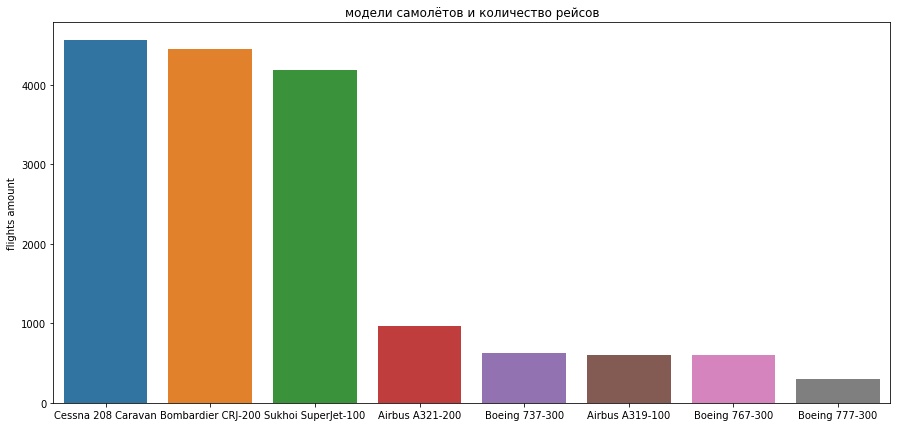

In [6]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')

plt.figure(figsize=(15, 7))
plt.title('модели самолётов и количество рейсов')
sns.barplot(x='model', y='flights_amount', data=query_1.sort_values(by='flights_amount', ascending=False))
plt.xlabel('')
plt.ylabel('flights amount')
plt.show()

По графику видно, что больше всего рейсов у Cessna, Bombardier и Sukhoi, у остальных значительно меньше.

построить график: города и количество рейсов

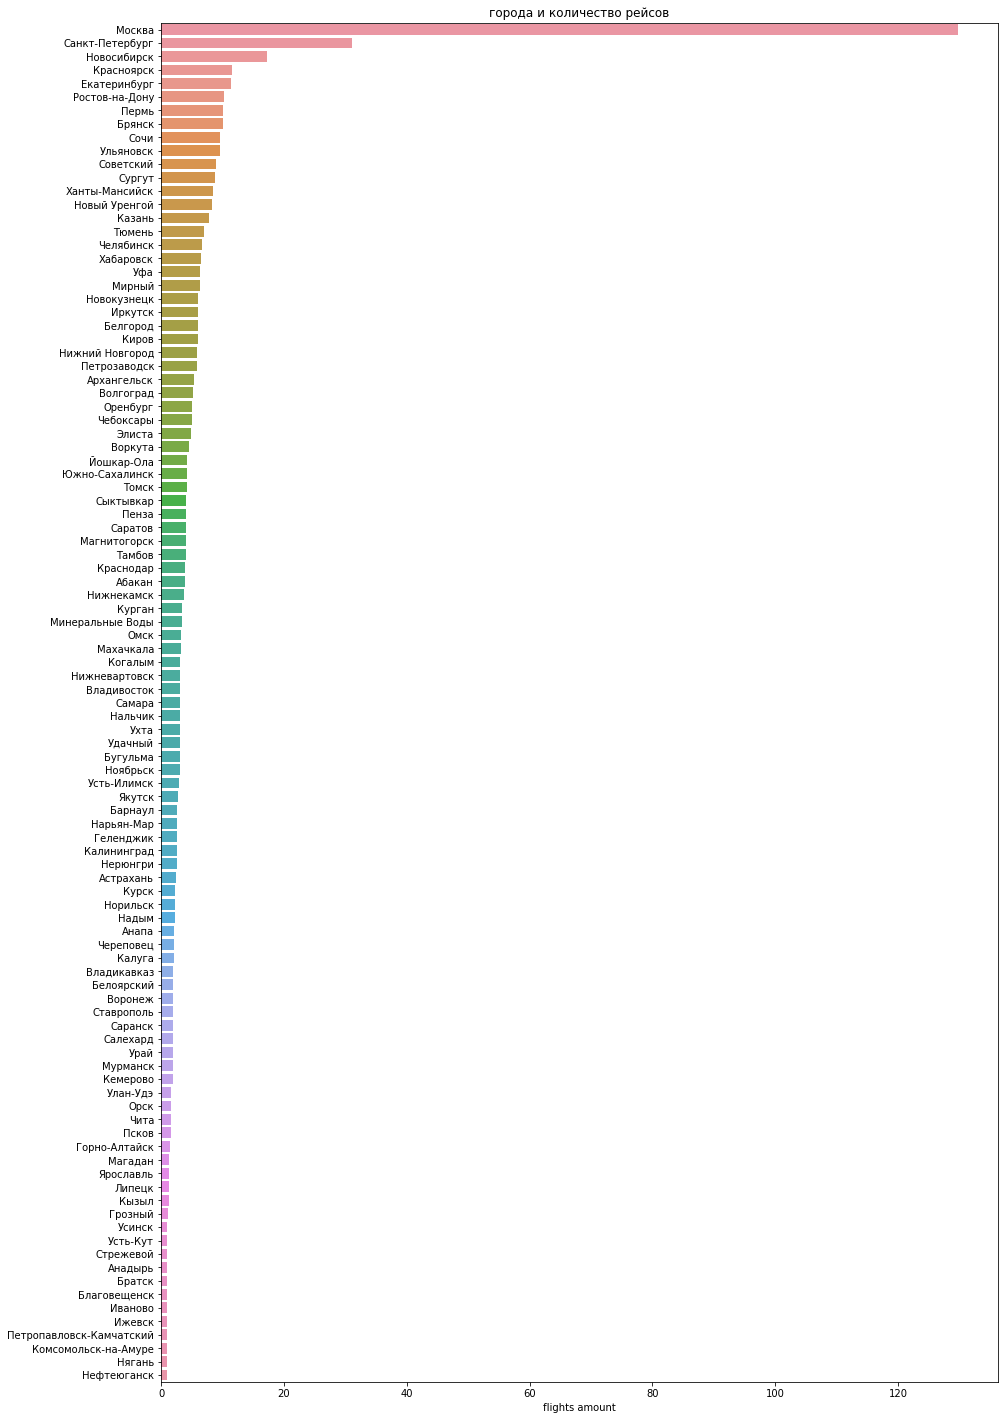

In [7]:
plt.figure(figsize=(15, 25))
plt.title('города и количество рейсов')
sns.barplot(x='average_flights', y='city', data=query_3.sort_values(by='average_flights', ascending=False))
plt.ylabel('')
plt.xlabel('flights amount')
plt.show()

По графику видно, что с гигантским отрывом впереди столица и у подавляющего большинства городов не более 10 рейсов в сутки.

построить график: топ-10 городов и количество рейсов

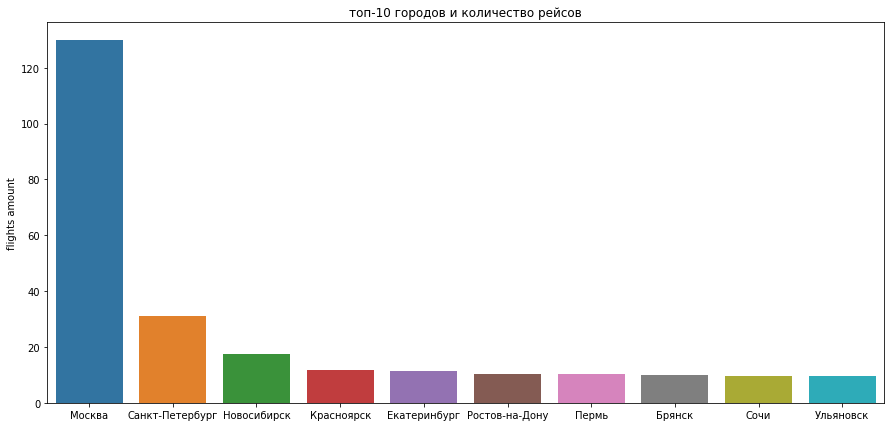

In [8]:
top10_cities=query_3.sort_values(by='average_flights', ascending=False).head(10)
top10_cities

plt.figure(figsize=(15, 7))
plt.title('топ-10 городов и количество рейсов')
sns.barplot(x='city', y='average_flights', data=top10_cities.sort_values(by='average_flights', ascending=False))
plt.xlabel('')
plt.ylabel('flights amount')
plt.show()

По графику видно, что в топ 10 городов по кол-ву рейсов попали либо курортные города, либо крупнейшие города России.

В данной работе я исследовал 2 набора данных с помощью PySpark, убедился в соответствии типов данных, а также отсутствии пропусков в них, построил несколько графиков и проанализировал.